## Librerías

In [125]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.svm import LinearSVC, SVC
import os

## Recolección de datos

In [126]:
imgNames = []
# imgNames1 = []
imgs = []
marks = []
reals = []


for fileName in os.listdir('datasets/images'):
    imgNames.append(fileName)
    
# for fileName in os.listdir('datasets/bordes_real'):
#     imgNames1.append(fileName)
    
    
# for fileName in imgNames1:
#     if fileName not in imgNames:
#         print(fileName)
            
            

for fileName in imgNames:
    img = cv2.imread('datasets/images/'+fileName)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    
    mark = cv2.imread('datasets/bordes_mr/'+fileName)
    marks.append(mark)
    
    real = cv2.imread('datasets/bordes_real/'+fileName)
    reals.append(real)

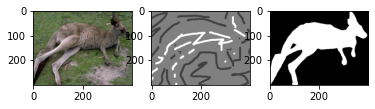

In [127]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(imgs[17])
plt.subplot(1,3,2)
plt.imshow(marks[17])
plt.subplot(1,3,3)
plt.imshow(reals[17])
plt.show()

## Redimensionar formato de datos

In [128]:
Ximgs = []
Xmasks = []
Xreals = []
nrowss = []
ncolss = []

for a,b,c in zip(imgs,marks,reals):
    nrows,ncols,nch = a.shape
    nrowss.append(nrows)
    ncolss.append(ncols)
    
    # Image vectorization
    Ximgs.append( np.reshape(a, (nrows*ncols,nch)) )
    Xmasks.append( np.reshape(b, (nrows*ncols,nch))[:,0] )
    Xreals.append( np.reshape(c, (nrows*ncols,nch))[:,0] )
    

## Xtrains y Ytrains

In [129]:
Xtrains = []
Ytrains = []

for Ximg,Xmask,Xreal in zip(Ximgs,Xmasks,Xreals):
    Xobj = Ximg[ Xmask==255, : ]
    Xbck = Ximg[ Xmask==64, : ]
    Xtrain = np.concatenate((Xobj, Xbck), axis=0)

    Yobj = np.ones((len(Xobj)))*255
    Ybck = np.zeros((len(Xbck)))
    Ytrain = np.concatenate((Yobj, Ybck), axis=0)

    Xtrains.append(Xtrain)
    Ytrains.append(Ytrain)

## Creación y entrenamiento de modelos LSVC y SVC

In [130]:
preds = []
predLs = []

for Xtrain,Ytrain,Ximg,nrows,ncols in zip(Xtrains,Ytrains,Ximgs,nrowss,ncolss):
    modelL = LinearSVC()
    modelL.fit(Xtrain, Ytrain)
    XpredL = modelL.predict(Ximg)
    predL = np.reshape(XpredL,(nrows,ncols))

    model = SVC()
    model.fit(Xtrain, Ytrain)
    Xpred = model.predict(Ximg)
    pred = np.reshape(Xpred,(nrows,ncols))
    
    preds.append(pred)
    predLs.append(predL)

C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alans\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

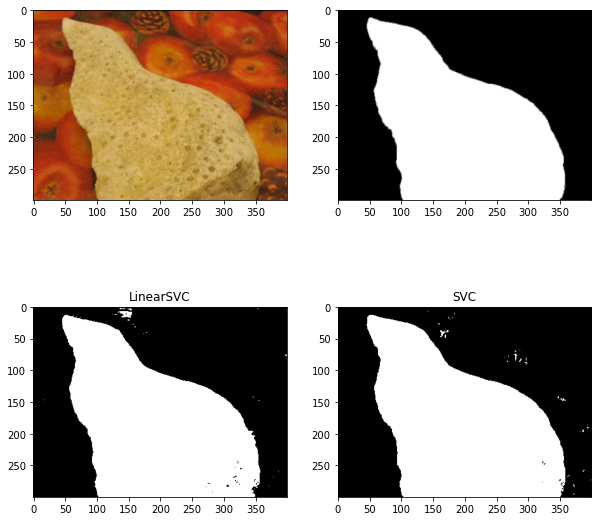

In [138]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(imgs[45])
plt.subplot(2,2,2)
plt.imshow(reals[45], cmap="gray")
plt.subplot(2,2,3)
plt.title("LinearSVC")
plt.imshow(predLs[45], cmap="gray")
plt.subplot(2,2,4)
plt.title("SVC")
plt.imshow(preds[45], cmap="gray")
plt.show()

## Obtención de los accuracy respecto a la imagen original

In [191]:
LSVC_avgs = []
SVC_avgs = []

# Linear svc
for predL,real in zip(predLs,reals):
    nrows,ncols = predL.shape
    total = nrows*ncols
    count = 0
    for predL1,real1 in zip(predL,real):
        for i,j in zip(predL1,real1):
            if(i == j[0]):
                count = count+1
    LSVC_avgs.append(count/total)
    
# SVC
for pred,real in zip(preds,reals):
    nrows,ncols = pred.shape
    total = nrows*ncols
    count = 0
    for pred1,real1 in zip(pred,real):
        for i,j in zip(pred1,real1):
            if(i == j[0]):
                count = count+1
    SVC_avgs.append(count/total)
    

print(LSVC_avgs)
print(SVC_avgs)

[0.920025, 0.9213916666666667, 0.8510416666666667, 0.9318916666666667, 0.9879416666666667, 0.9283, 0.19421666666666668, 0.8483166666666667, 0.968625, 0.325375, 0.833875, 0.9167666666666666, 0.812425, 0.8620916666666667, 0.9468583333333334, 0.9681, 0.7595166666666666, 0.6888583333333334, 0.9678583333333334, 0.9808083333333333, 0.9412583333333333, 0.927, 0.9235416666666667, 0.9037166666666666, 0.8082666666666667, 0.8549666666666667, 0.9894583333333333, 0.293125, 0.9706416666666666, 0.9902083333333334, 0.8398166666666667, 0.8235, 0.7918916666666667, 0.9569166666666666, 0.975875, 0.9358333333333333, 0.981175, 0.7949333333333334, 0.911525, 0.9370916666666667, 0.9035666666666666, 0.7920833333333334, 0.9578666666666666, 0.9859166666666667, 0.9881916666666667, 0.9871166666666666, 0.7986416666666667, 0.9180416666666666]
[0.957825, 0.9255833333333333, 0.9518666666666666, 0.9411166666666667, 0.9876416666666666, 0.9439416666666667, 0.8117333333333333, 0.9247083333333334, 0.9663416666666667, 0.8157

## Impresión del promedio de los accuracy de LSVC

In [193]:
print("Linear SVC averages:")
print(LSVC_avgs,'\n')
print("Linear SVC average",np.average(LSVC_avgs))


Linear SVC averages:
[0.920025, 0.9213916666666667, 0.8510416666666667, 0.9318916666666667, 0.9879416666666667, 0.9283, 0.19421666666666668, 0.8483166666666667, 0.968625, 0.325375, 0.833875, 0.9167666666666666, 0.812425, 0.8620916666666667, 0.9468583333333334, 0.9681, 0.7595166666666666, 0.6888583333333334, 0.9678583333333334, 0.9808083333333333, 0.9412583333333333, 0.927, 0.9235416666666667, 0.9037166666666666, 0.8082666666666667, 0.8549666666666667, 0.9894583333333333, 0.293125, 0.9706416666666666, 0.9902083333333334, 0.8398166666666667, 0.8235, 0.7918916666666667, 0.9569166666666666, 0.975875, 0.9358333333333333, 0.981175, 0.7949333333333334, 0.911525, 0.9370916666666667, 0.9035666666666666, 0.7920833333333334, 0.9578666666666666, 0.9859166666666667, 0.9881916666666667, 0.9871166666666666, 0.7986416666666667, 0.9180416666666666] 

Linear SVC average 0.8645093749999999


## Impresión del promedio de los accuracy de SVC

In [194]:
print("SVC averages:")
print(SVC_avgs,'\n')
print("SVC average",np.average(SVC_avgs))

SVC averages:
[0.957825, 0.9255833333333333, 0.9518666666666666, 0.9411166666666667, 0.9876416666666666, 0.9439416666666667, 0.8117333333333333, 0.9247083333333334, 0.9663416666666667, 0.8157666666666666, 0.811725, 0.9136583333333334, 0.885825, 0.9477916666666667, 0.9626916666666666, 0.977725, 0.9071916666666666, 0.8796833333333334, 0.9670666666666666, 0.9783833333333334, 0.961625, 0.9608083333333334, 0.9793916666666667, 0.9543666666666667, 0.8051416666666666, 0.923925, 0.9905666666666667, 0.946475, 0.9767833333333333, 0.9964166666666666, 0.840075, 0.9371166666666667, 0.9054166666666666, 0.9636083333333333, 0.9766416666666666, 0.9758833333333333, 0.984225, 0.8607916666666666, 0.9316916666666667, 0.9441666666666667, 0.9837416666666666, 0.9429833333333333, 0.9683583333333333, 0.9838416666666666, 0.9916, 0.9892833333333333, 0.7986416666666667, 0.9565333333333333] 

SVC average 0.9351743055555556
